<a href="https://colab.research.google.com/github/Kymapo/AMATH581/blob/main/AMATH581HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Eigenvalue for mode 1: 0.9999999767771443
Eigenvalue for mode 2: 2.999999401945388
Eigenvalue for mode 3: 4.9999895303975785
Eigenvalue for mode 4: 6.999883168935776
Eigenvalue for mode 5: 8.999060606956483


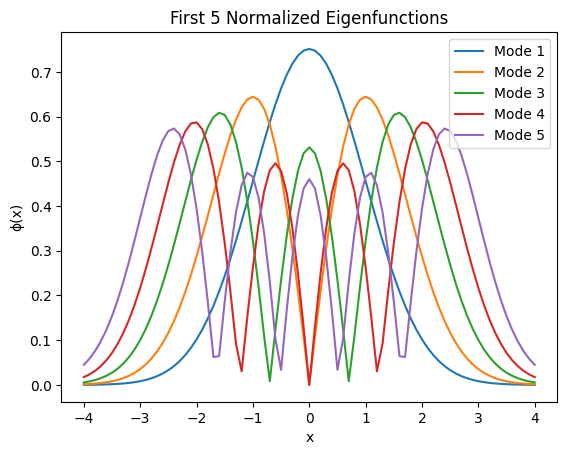

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system based on d²ϕ/dx² - (Kx² - ε)ϕ = 0
def shoot_system(phi, x, epsilon, K):
    return [phi[1], (K * x**2 - epsilon) * phi[0]]

# Normalize the eigenfunction
def normalize(psi, x):
    norm = np.trapz(y = (psi)**2, x = x)  # Numerical integration for normalization
    return psi / np.sqrt(norm)  # Normalize by sqrt of the integral

# Parameters
L = 4  # Range boundary (x ∈ [-L, L])
h = 0.1  # Step size
x = np.arange(-L, L + h, h)  # Discretized x values from -L to L
phi0 = [1, 1]  # Initial conditions for ϕ(-L) = 0 and arbitrary ϕ'(-L) = 1
K = 1  # Potential constant, modify this as needed
tol = 1e-6  # Tolerance for convergence

eigenvalues = []
eigenfunctions = []

# Guessed initial eigenvalues for the first 5 modes
epsilon_values = [0, 1.0, 3.0, 5.0, 7.0, 9.0]  # Adjust based on trial/error

# Shooting scheme loop over the first 5 modes
for modes in range(1,6):
    epsilon = epsilon_values[modes]  # Initial guess for the eigenvalue
    delta_epsilon = 0.1  # Step size for adjusting the eigenvalue
    phi0 = [1, np.sqrt(K * L**2 - epsilon)]

    # Begin convergence loop for eigenvalue (epsilon)
    for _ in range(1000):
        psi = odeint(shoot_system, phi0, x, args=(epsilon, K))  # Solve the ODE
        phi0 = [1, np.sqrt(K * L**2 - epsilon)]

        if abs(psi[-1,1] + np.sqrt(K * L**2 - epsilon) * psi[-1,0]) < tol:  # If the boundary condition at x = L is satisfied
            print(f"Eigenvalue for mode {modes}: {epsilon}")
            break  # Convergence reached

        # Adjust epsilon based on the boundary condition at x = L
        if (-1)**(modes + 1) * (psi[-1,1] + np.sqrt(K*L**2 - epsilon) * psi[-1,0]) > 0:
            epsilon += delta_epsilon  # Increase epsilon
        else:
            epsilon -= delta_epsilon / 2  # Refine the step size and decrease epsilon
            delta_epsilon /= 2  # Reduce step size for finer convergence
    # Normalize the eigenfunction after finding eigenvalue
    normalized_psi = normalize(psi[:,0], x)

    # Append the normalized eigenfunction and eigenvalue
    eigenfunctions.append(np.abs(normalized_psi))
    eigenvalues.append(epsilon)

# Convert results to numpy arrays
eigenfunctions_matrix = np.column_stack(eigenfunctions)  # 5-column matrix for eigenfunctions
eigenvalues_vector = np.array(eigenvalues)  # 1x5 vector for eigenvalues

# Plot the eigenfunctions
for i in range(5):
    plt.plot(x, eigenfunctions_matrix[:, i], label=f"Mode {i + 1}")

plt.title("First 5 Normalized Eigenfunctions")
plt.xlabel("x")
plt.ylabel("ϕ(x)")
plt.legend()
plt.show()

# Output the eigenfunctions matrix and eigenvalues vector
#print(eigenfunctions_matrix)
#print('')
#print(eigenvalues_vector)

A1 = eigenfunctions_matrix
A2 = eigenvalues_vector